## Parte 1

In [102]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [103]:
#Importamos la data en txt
#donoso.txt
#huaragal.txt

In [104]:
df_1 = pd.read_csv("donoso.txt", sep=" ",header=None)
df_2 = pd.read_csv("huarangal.txt", sep=" ",header=None)
df_2.columns=['1','2','3','prec_acum','Max','Min']
df_1.columns=['1','2','3','prec_acum','Max','Min']
df_1 = df_1.astype({"1": 'str', "2": 'str',"3": 'str'})
df_2 = df_2.astype({"1": 'str', "2": 'str',"3": 'str'})
df_1['date']=df_1['1']+'-'+df_1['2']+'-'+df_1['3']
df_2['date']=df_2['1']+'-'+df_2['2']+'-'+df_2['3']
donoso=df_1[['date','prec_acum','Max','Min']]
huarangal=df_2[['date','prec_acum','Max','Min']]
donoso.set_index('date',inplace=True)
huarangal.set_index('date',inplace=True)
huarangal


,prec_acum,Max,Min
date,,,
1980-2-1,0.0,28.8,20.2
1980-2-2,0.0,26.2,21.6
1980-2-3,0.0,27.8,18.6
1980-2-4,0.0,24.5,18.2
1980-2-5,0.0,26.4,18.5
...,...,...,...
2011-11-26,0.0,25.3,14.4
2011-11-27,0.0,26.8,14.9
2011-11-28,0.0,26.4,14.8


In [105]:
df_total=pd.merge(donoso,huarangal,left_index=True,right_index=True)
df_total.reset_index(inplace=True)
# Convertimos date a tiempo
df_total['date'] = pd.to_datetime(df_total['date'])
# df_total.set_index('date',inplace=True)
# df_total.dtypes
df_total = df_total[['Max_x', 'Min_x','Max_y','Min_y','date']].replace(-99.9,np.nan)
#df_total.isna().sum()
#df_total.dtypes
for i in df_total.columns:
    #print(df_total[i].mean())
    df_total[i].fillna(df_total[i].mean(),inplace=True)
df_total.dtypes
df_total.set_index('date',inplace=True)
#df_total.isna().sum()
df_total.columns

Index(['Max_x', 'Min_x', 'Max_y', 'Min_y'], dtype='object')

<IPython.core.display.Javascript object>


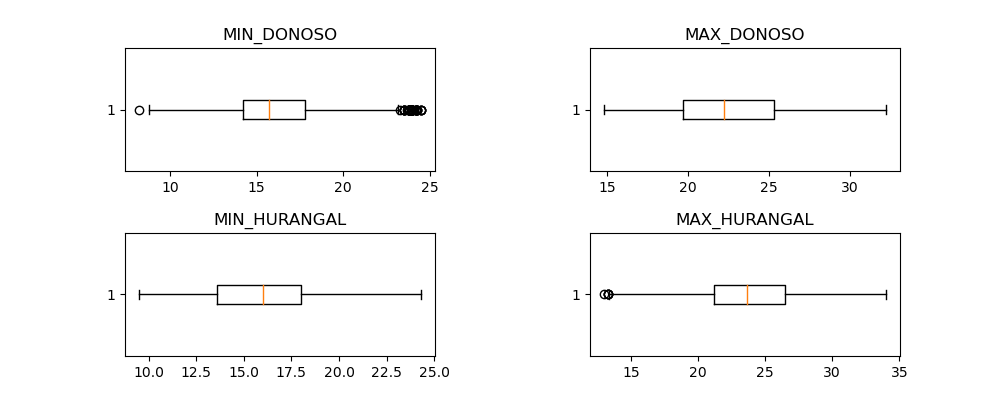

Text(0.5, 1.0, 'MAX_HURANGAL')

In [106]:
import matplotlib.gridspec as gridspec
plt.figure()
aspect=gridspec.GridSpec(2,2)
#Code for increasing space between grid
#https://stackoverflow.com/questions/34571623/how-do-i-increase-the-spacing-between-subplots-with-subplot2grid
aspect.update(wspace = 0.5, hspace = 0.5)
figure_1=plt.subplot(aspect[0,0])
figure_2=plt.subplot(aspect[0,1])
figure_3=plt.subplot(aspect[1,0])
figure_4=plt.subplot(aspect[1,1])
#Remember its easy to plot using seaborn, but its not easy to include those fig in 
# sns.boxplot(x='Min_x',y=None,data=df_total)
figure_1.boxplot(df_total['Min_x'],vert=False)
figure_2.boxplot(df_total['Max_x'],vert=False )
figure_3.boxplot(df_total['Min_y'],vert=False )
figure_4.boxplot(df_total['Max_y'],vert=False )
figure_1.set_title('MIN_DONOSO')
figure_2.set_title('MAX_DONOSO')
figure_3.set_title('MIN_HURANGAL')
figure_4.set_title('MAX_HURANGAL')

<IPython.core.display.Javascript object>


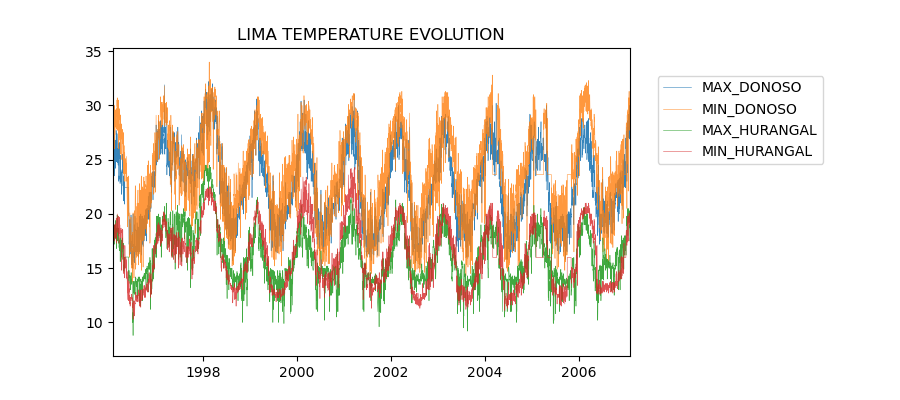

In [99]:
import datetime
#df_total.set_index('date',inplace=True)
df_total.columns=['MAX_D','MIN_D','MAX_H','MIN_H']
plt.figure(figsize=(9,4))
plt.plot(df_total['MAX_D'],'-',linewidth=0.4,alpha=0.9)
plt.plot(df_total['MAX_H'],'-',linewidth=0.4,alpha=0.8)
plt.plot(df_total['MIN_D'],'-',linewidth=0.4,alpha=0.9)
plt.plot(df_total['MIN_H'],'-',linewidth=0.4,alpha=0.8)
# plt.rcParams["figure.figsize"] = 10, 4
#xlim with dates 
#https://stackoverflow.com/questions/21423158/how-do-i-change-the-range-of-the-x-axis-with-datetimes-in-matplotlib
plt.xlim([datetime.date(1996, 1, 26), datetime.date(2007, 2, 1)])
plt.title('LIMA TEMPERATURE EVOLUTION')


#legend out of the plot
plt.legend(['MAX_DONOSO','MIN_DONOSO','MAX_HURANGAL','MIN_HURANGAL'],bbox_to_anchor=(1.04,0.6))
#https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot/43439132#43439132
plt.subplots_adjust(right=0.7)

<IPython.core.display.Javascript object>


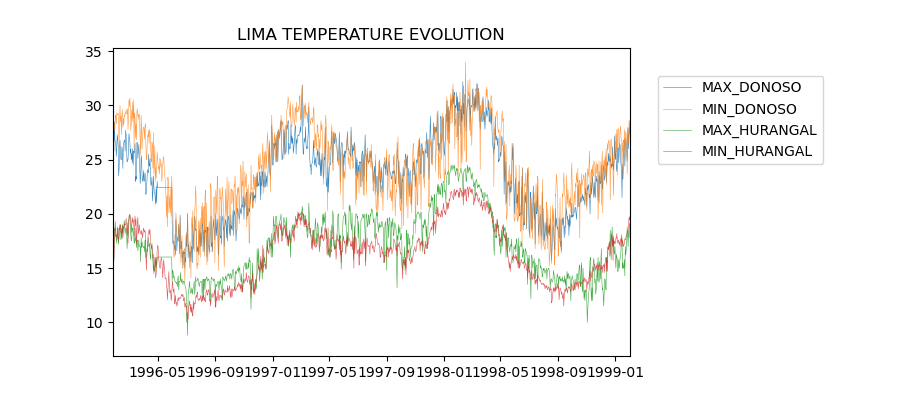

In [108]:
import datetime
#df_total.set_index('date',inplace=True)
df_total.columns=['MAX_D','MIN_D','MAX_H','MIN_H']
plt.figure(figsize=(9,4))
plt.plot(df_total['MAX_D'],'-',linewidth=0.4,alpha=0.9)
plt.plot(df_total['MAX_H'],'-',linewidth=0.4,alpha=0.8)
plt.plot(df_total['MIN_D'],'-',linewidth=0.4,alpha=0.9)
plt.plot(df_total['MIN_H'],'-',linewidth=0.4,alpha=0.8)
# plt.rcParams["figure.figsize"] = 10, 4
#xlim with dates 
#https://stackoverflow.com/questions/21423158/how-do-i-change-the-range-of-the-x-axis-with-datetimes-in-matplotlib
plt.xlim([datetime.date(1996, 1, 26), datetime.date(1999, 2, 1)])
plt.title('LIMA TEMPERATURE EVOLUTION')


#legend out of the plot
plt.legend(['MAX_DONOSO','MIN_DONOSO','MAX_HURANGAL','MIN_HURANGAL'],bbox_to_anchor=(1.04,0.6))
#https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot/43439132#43439132
plt.subplots_adjust(right=0.7)